0.5800850425652784
0.2706984193987876
0.19090102823568278


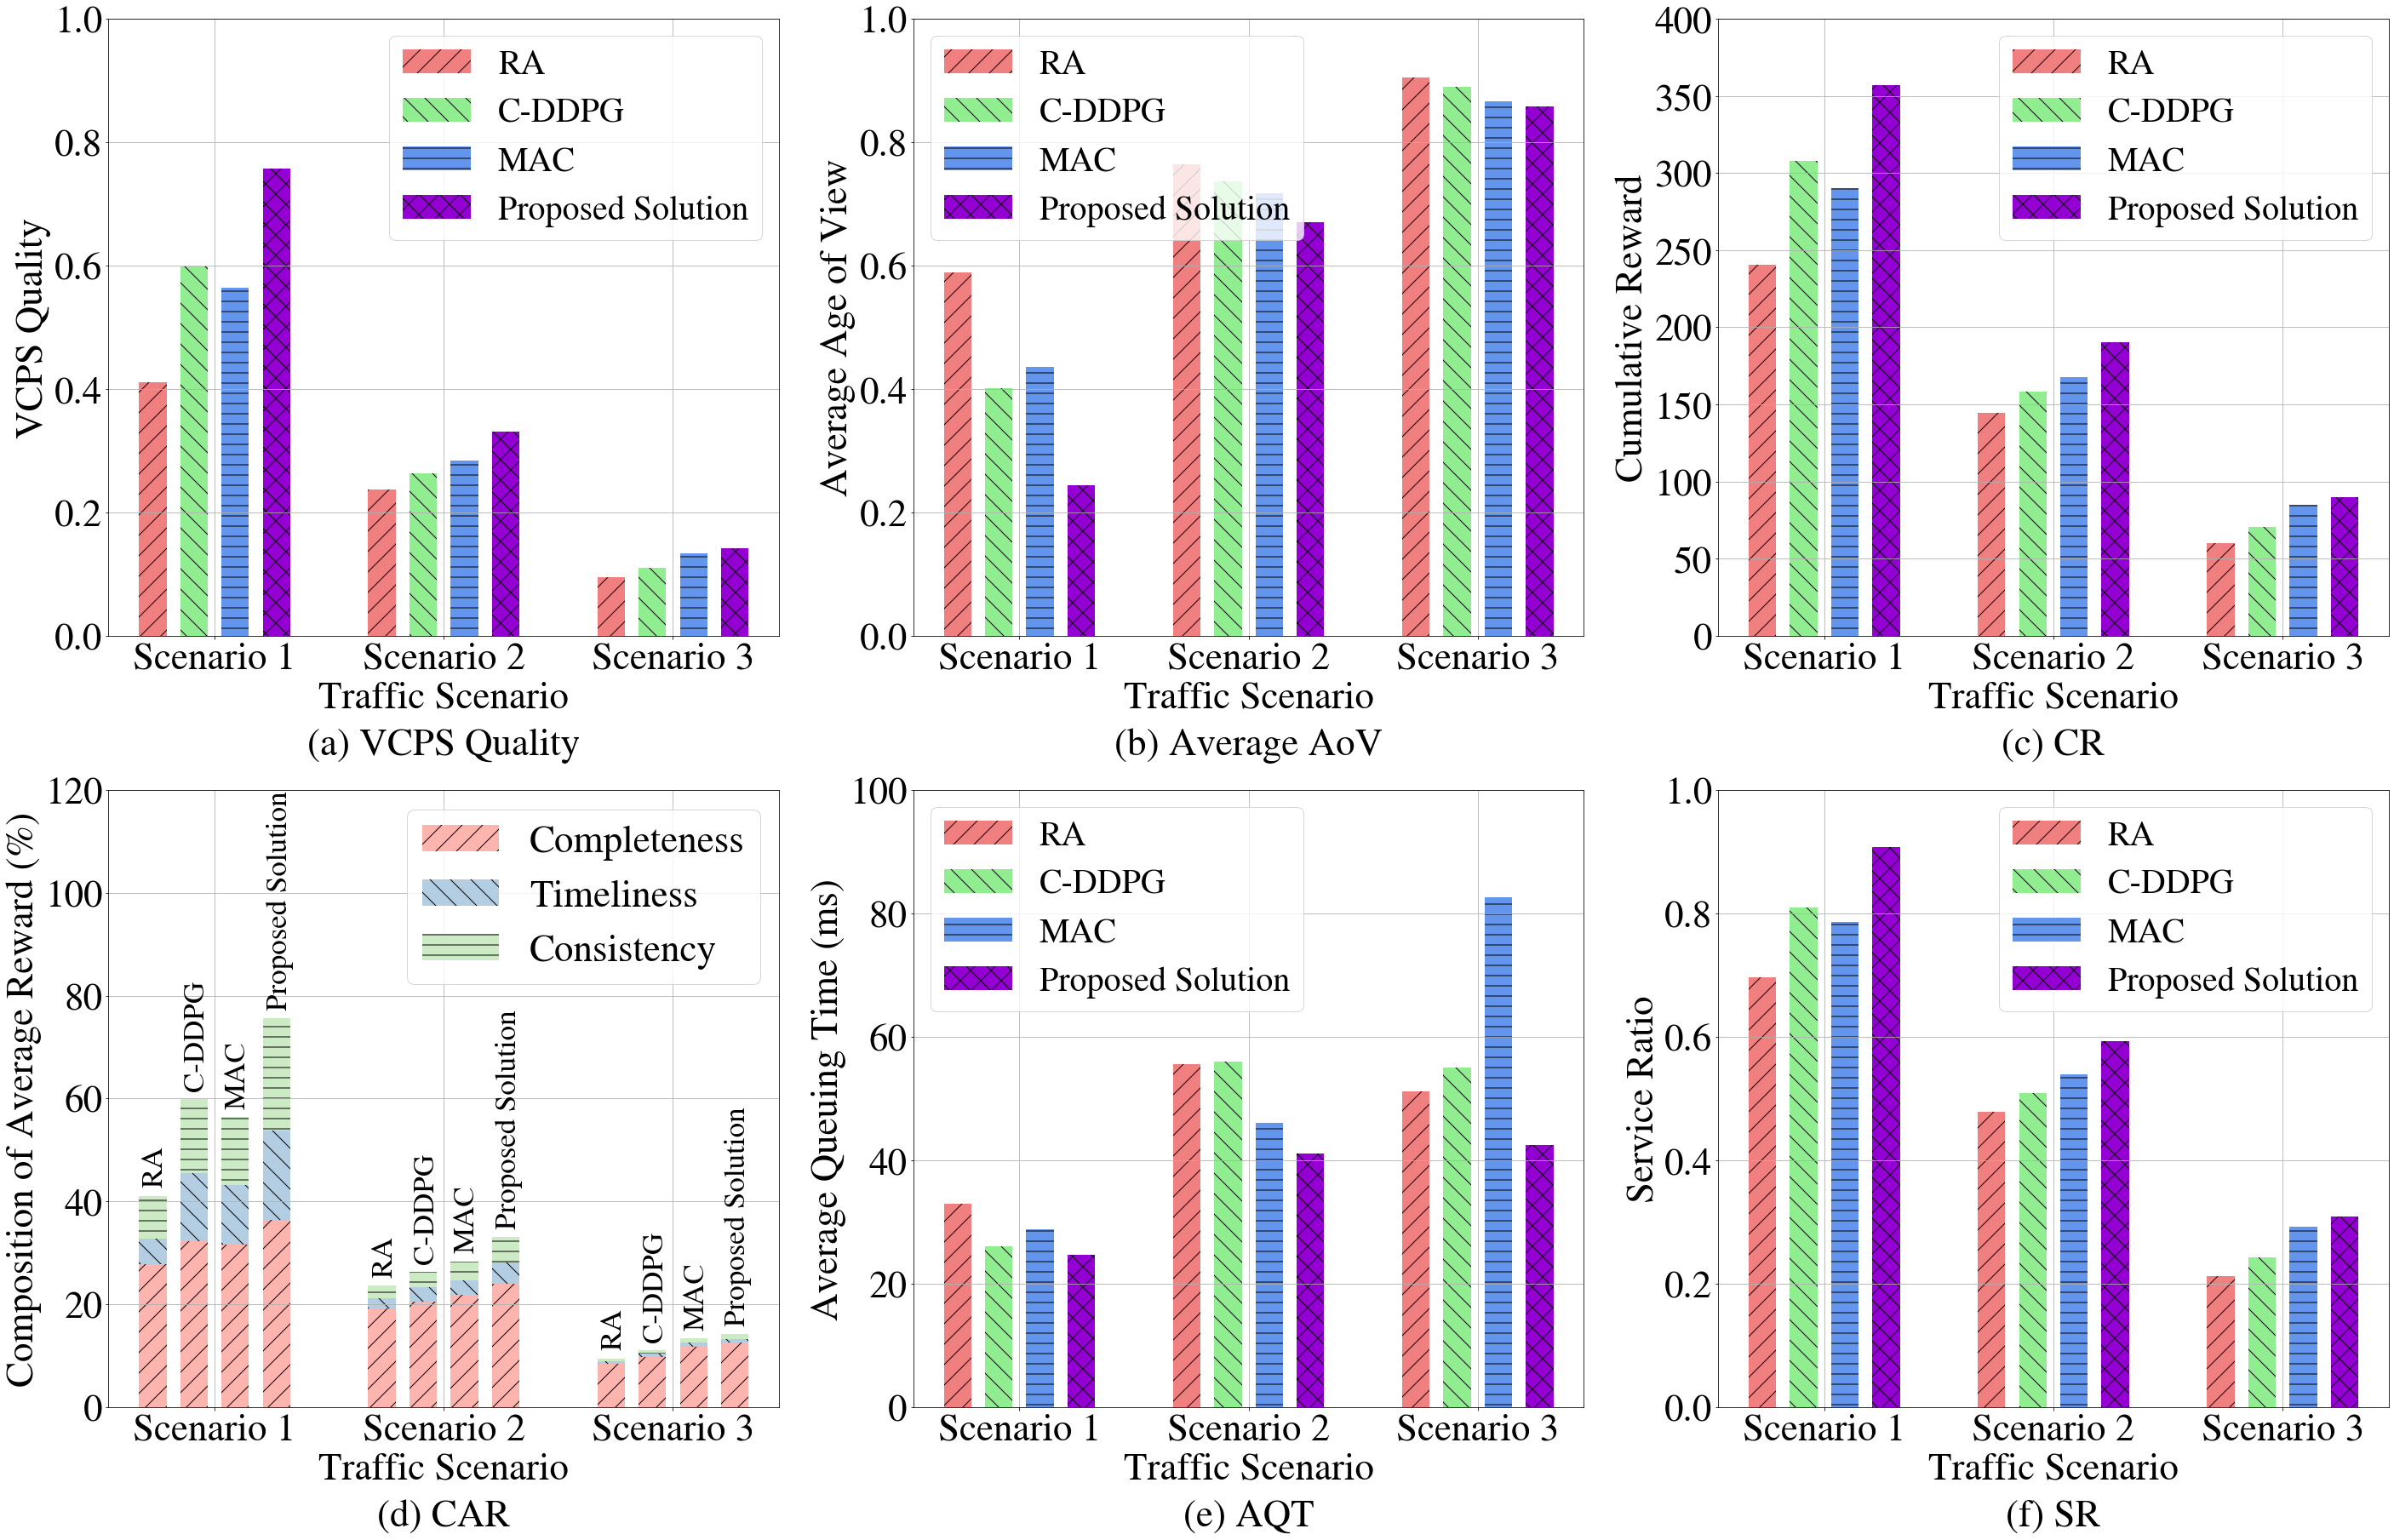

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import numpy as np

import brewer2mpl
# brewer2mpl.get_map args: set name set type number of colors
bmap = brewer2mpl.get_map('Pastel1', 'qualitative', 3)
new_colors = bmap.mpl_colors
# new_colors = ['seashell', 'honeydew', 'lightcyan']

fig_title = ['(a) VCPS Quality', '(b) Average AoV', '(c) CR', '(d) CAR', '(e) AQT', '(f) SR']

labels = ['RA', 'C-DDPG', 'MAC', 'MAC-GBA', 'MDR']
labels = ['RA', 'C-DDPG', 'C-DDPG', 'MAC', 'Proposed Solution']

colors = ['lightcoral', 'orange', 'lightgreen', 'cornflowerblue', 'darkviolet', 'seashell', 'honeydew', 'lightcyan']
markers = ['*', 'd', 's', '^', 'o']
font_size = 45
legend_size = 40
markersize = 20
plt.figure(figsize=(48, 30))            # 确定图像画布的大小
plt.rcParams['font.sans-serif'] = ['Nimbus Roman']  # 设置字体
x_label = 'Traffic Scenario'
#################################################################### #################################################################
plt.subplot(2, 3, 1)                        # 将画布分为两列

plt.xlabel(x_label, fontsize=font_size)                          # x轴的label
plt.ylabel('VCPS Quality', fontsize=font_size)          # y轴的label     备注（plot所有的原件都可以加fontsize属性）
plt.title(fig_title[0], fontsize=font_size, y=-0.2)     # 图的title

x_vals = [1, 2, 3]
ra_timeliness =         [119.49040101647, 171.64646109932931, 244.0789433874059]
c_ddpg_timeliness =     [63.399466618854, 151.99335686865882, 229.4624287505197]
iac_timeliness =        [71.86936523555500, 150.4398041277439, 221.2455888360908]
madr_ga_timeliness =    [44.8817911744236, 130.38747480594978, 217.43427653356477]

ra_consistence =        [916.0638812925400, 1558.092722505665, 2363.5105771795384]
c_ddpg_consistence =    [576.2748987485260, 1462.7582854003283, 2267.6262319321017]
iac_consistence =       [628.0975888313910, 1362.6878576652846, 2117.4575142690264]
madr_ga_consistence =   [274.902607644425, 1203.754644527783, 2062.0866154161868]

ra_completeness =       [0.694646023590775, 0.4806415806415808, 0.21217391211747888]
c_ddpg_completeness =   [0.8079083670838250, 0.5124140031024906, 0.24412458935596631]
iac_completeness =      [0.7906341370562040, 0.5457707141115719, 0.2941808285769912]
madr_ga_completeness =  [0.908365797451858, 0.5987484518240722, 0.31263779486127097]

for i in range(len(ra_timeliness)):
    ra_timeliness[i] = 3 / 10 * (np.tanh(ra_timeliness[i] / 100)) 
    c_ddpg_timeliness[i] = 3 / 10 * (np.tanh(c_ddpg_timeliness[i] / 100))
    iac_timeliness[i] = 3 / 10 * (np.tanh(iac_timeliness[i] / 100))
    madr_ga_timeliness[i] = 3 / 10 * (np.tanh(madr_ga_timeliness[i] / 100))

for i in range(len(ra_consistence)):
    ra_consistence[i] = 3 / 10 * (np.tanh(ra_consistence[i] / 1000))
    c_ddpg_consistence[i] = 3 / 10 * (np.tanh(c_ddpg_consistence[i] / 1000))
    iac_consistence[i] = 3 / 10 * (np.tanh(iac_consistence[i] / 1000))
    madr_ga_consistence[i] = 3 / 10 * (np.tanh(madr_ga_consistence[i] / 1000))

for i in range(len(ra_completeness)):
    ra_completeness[i] = 4 / 10 * (1 - ra_completeness[i])
    c_ddpg_completeness[i] = 4 / 10 * (1 - c_ddpg_completeness[i])
    iac_completeness[i] = 4 / 10 * (1 - iac_completeness[i])
    madr_ga_completeness[i] = 4 / 10 * (1 - madr_ga_completeness[i])

ra_aaov = [0.0, 0.0, 0.0]
c_ddpg_aaov = [0.0, 0.0, 0.0]
iac_aaov = [0.0, 0.0, 0.0]
madr_ga_aaov = [0.0, 0.0, 0.0]
for i in range(len(ra_timeliness)):
    ra_aaov[i] = 1 -(ra_timeliness[i] + ra_completeness[i] + ra_consistence[i])
    c_ddpg_aaov[i] = 1 - (c_ddpg_timeliness[i] + c_ddpg_completeness[i] + c_ddpg_consistence[i])
    iac_aaov[i] = 1 - (iac_timeliness[i] + iac_completeness[i] + iac_consistence[i])
    madr_ga_aaov[i] = 1 - (madr_ga_timeliness[i] + madr_ga_completeness[i] + madr_ga_consistence[i])

ra_improvement = 0
c_ddpg_improvement = 0
iac_imporvement = 0
for i in range(len(ra_timeliness)):
    ra_improvement += (madr_ga_aaov[i] - ra_aaov[i] ) / ra_aaov[i]
    c_ddpg_improvement += (madr_ga_aaov[i] - c_ddpg_aaov[i] ) / c_ddpg_aaov[i]
    iac_imporvement += (madr_ga_aaov[i] - iac_aaov[i] ) / iac_aaov[i]
print(ra_improvement / 3)
print(c_ddpg_improvement / 3)
print(iac_imporvement / 3)

new_x_index = ['Scenario 1', 'Scenario 2', 'Scenario 3']
diff = 1
x = np.arange(1, 4, 1)

width = diff * 0.12
small_width = diff * 0.03
label_text_size = 32

plt.grid()
plt.bar(x - width - 5 * small_width, ra_aaov, width, label=labels[0], hatch="/", color=colors[0], edgecolor=None)
plt.bar(x - width + 1 * small_width, c_ddpg_aaov, width, label=labels[2], hatch="\\", color=colors[2], edgecolor=None)
plt.bar(x + 3 * small_width, iac_aaov, width, hatch="-", label=labels[3], color=colors[3], edgecolor=None)
plt.bar(x + 9 * small_width, madr_ga_aaov, width, label=labels[4], hatch="x", color=colors[4], edgecolor=None)


ax = plt.gca()
plt.xticks(x_vals, new_x_index, fontsize=font_size)
plt.ylim(0, 1)                     # 设置y轴的取值范围，如设置（0,5）则y轴坐标为从0开始，到5结束
# 刻度值字体大小设置
plt.tick_params(labelsize=font_size)        # 设置坐标轴上刻度的字体大小
plt.legend(loc=0, fontsize = legend_size)     # 显示图例，loc=0表示图例会根据图片情况自动摆放
# plt.show()
#################################################################### #################################################################
plt.subplot(2, 3, 2) 
plt.xlabel(x_label, fontsize=font_size)                          # x轴的label
plt.ylabel('Average Age of View', fontsize=font_size)          # y轴的label     备注（plot所有的原件都可以加fontsize属性）
plt.title(fig_title[1], fontsize=font_size, y=-0.2)     # 图的title

x_vals = [1, 2, 3]

ra_timeliness =         [119.49040101647, 171.64646109932931, 244.0789433874059]
c_ddpg_timeliness =     [63.399466618854, 151.99335686865882, 229.4624287505197]
iac_timeliness =        [71.86936523555500, 150.4398041277439, 221.2455888360908]
madr_ga_timeliness =    [44.8817911744236, 130.38747480594978, 217.43427653356477]

ra_consistence =        [916.0638812925400, 1558.092722505665, 2363.5105771795384]
c_ddpg_consistence =    [576.2748987485260, 1462.7582854003283, 2267.6262319321017]
iac_consistence =       [628.0975888313910, 1362.6878576652846, 2117.4575142690264]
madr_ga_consistence =   [274.902607644425, 1203.754644527783, 2062.0866154161868]

ra_completeness =       [0.694646023590775, 0.4806415806415808, 0.21217391211747888]
c_ddpg_completeness =   [0.8079083670838250, 0.5124140031024906, 0.24412458935596631]
iac_completeness =      [0.7906341370562040, 0.5457707141115719, 0.2941808285769912]
madr_ga_completeness =  [0.908365797451858, 0.5987484518240722, 0.31263779486127097]

for i in range(len(ra_timeliness)):
    ra_timeliness[i] = 3 / 10 * (np.tanh(ra_timeliness[i] / 100)) 
    c_ddpg_timeliness[i] = 3 / 10 * (np.tanh(c_ddpg_timeliness[i] / 100))
    iac_timeliness[i] = 3 / 10 * (np.tanh(iac_timeliness[i] / 100))
    madr_ga_timeliness[i] = 3 / 10 * (np.tanh(madr_ga_timeliness[i] / 100))

for i in range(len(ra_consistence)):
    ra_consistence[i] = 3 / 10 * (np.tanh(ra_consistence[i] / 1000))
    c_ddpg_consistence[i] = 3 / 10 * (np.tanh(c_ddpg_consistence[i] / 1000))
    iac_consistence[i] = 3 / 10 * (np.tanh(iac_consistence[i] / 1000))
    madr_ga_consistence[i] = 3 / 10 * (np.tanh(madr_ga_consistence[i] / 1000))

for i in range(len(ra_completeness)):
    ra_completeness[i] = 4 / 10 * (1 - ra_completeness[i])
    c_ddpg_completeness[i] = 4 / 10 * (1 - c_ddpg_completeness[i])
    iac_completeness[i] = 4 / 10 * (1 - iac_completeness[i])
    madr_ga_completeness[i] = 4 / 10 * (1 - madr_ga_completeness[i])

ra_aaov = [0.0, 0.0, 0.0]
c_ddpg_aaov = [0.0, 0.0, 0.0]
iac_aaov = [0.0, 0.0, 0.0]
madr_ga_aaov = [0.0, 0.0, 0.0]
for i in range(len(ra_timeliness)):
    ra_aaov[i] = ra_timeliness[i] + ra_completeness[i] + ra_consistence[i]
    c_ddpg_aaov[i] = c_ddpg_timeliness[i] + c_ddpg_completeness[i] + c_ddpg_consistence[i]
    iac_aaov[i] = iac_timeliness[i] + iac_completeness[i] + iac_consistence[i]
    madr_ga_aaov[i] = madr_ga_timeliness[i] + madr_ga_completeness[i] + madr_ga_consistence[i]


new_x_index = ['Scenario 1', 'Scenario 2', 'Scenario 3']
diff = 1
x = np.arange(1, 4, 1)

width = diff * 0.12
small_width = diff * 0.03
label_text_size = 30

plt.grid()
plt.bar(x - width - 5 * small_width, ra_aaov, width, label=labels[0], hatch="/", color=colors[0], edgecolor=None)
plt.bar(x - width + 1 * small_width, c_ddpg_aaov, width, label=labels[2], hatch="\\", color=colors[2], edgecolor=None)
plt.bar(x + 3 * small_width, iac_aaov, width, hatch="-", label=labels[3], color=colors[3], edgecolor=None)
iac_ga_cp = plt.bar(x + 9 * small_width, madr_ga_aaov, width, label=labels[4], hatch="x", color=colors[4], edgecolor=None)



ax = plt.gca()
plt.xticks(x_vals, new_x_index, fontsize=font_size)
plt.ylim(0, 1)                     # 设置y轴的取值范围，如设置（0,5）则y轴坐标为从0开始，到5结束
# 刻度值字体大小设置
plt.tick_params(labelsize=font_size)        # 设置坐标轴上刻度的字体大小
plt.legend(loc=0, fontsize = legend_size)     # 显示图例，loc=0表示图例会根据图片情况自动摆放
# plt.show()

#################################################################### #################################################################
plt.subplot(2, 3, 3) 
plt.xlabel(x_label, fontsize=font_size)                          # x轴的label
plt.ylabel('Cumulative Reward', fontsize=font_size)          # y轴的label     备注（plot所有的原件都可以加fontsize属性）
plt.title(fig_title[2], fontsize=font_size, y=-0.2)     # 图的title

x_vals = [1, 2, 3]

ra_ra = [240.467731991647, 144.34063445468652, 60.22952140694026]
c_ddpg_ra = [307.999658582648, 158.2409871412026, 70.37545782890032]
iac_ra = [290.4434458219750, 167.8859194388541, 84.71881485745725]
madr_ga_ra = [357.196511301275, 190.48437673691848, 90.01496499391253]

new_x_index = ['Scenario 1', 'Scenario 2', 'Scenario 3']
diff = 1
x = np.arange(1, 4, 1)

width = diff * 0.12
small_width = diff * 0.03
label_text_size = 30

plt.grid()
plt.bar(x - width - 5 * small_width, ra_ra, width, label=labels[0], hatch="/", color=colors[0], edgecolor=None)
plt.bar(x - width + 1 * small_width, c_ddpg_ra, width, label=labels[2], hatch="\\", color=colors[2], edgecolor=None)
plt.bar(x + 3 * small_width, iac_ra, width, hatch="-", label=labels[3], color=colors[3], edgecolor=None)
plt.bar(x + 9 * small_width, madr_ga_ra, width, label=labels[4], hatch="x", color=colors[4], edgecolor=None)

ax = plt.gca()
plt.xticks(x_vals, new_x_index, fontsize=font_size)
plt.ylim(0, 400)                     # 设置y轴的取值范围，如设置（0,5）则y轴坐标为从0开始，到5结束
# 刻度值字体大小设置
plt.tick_params(labelsize=font_size)        # 设置坐标轴上刻度的字体大小
plt.legend(loc=0, fontsize = legend_size)     # 显示图例，loc=0表示图例会根据图片情况自动摆放
# plt.show()
#################################################################### #################################################################

plt.subplot(2, 3, 4)
# plt.figure(figsize=(16, 12))
plt.xlabel(x_label, fontsize=font_size)
plt.ylabel('Composition of Average Reward (%)', fontsize=font_size)
plt.title(fig_title[3], fontsize=font_size, y=-0.2)     # 图的title

x_vals = [1, 2, 3]
new_x_index = ['Scenario 1', 'Scenario 2', 'Scenario 3']
# y_vals = [0.0, 20.0, 40.0, 60.0, 80.0, 100.0, 120.0]
# new_y_index = ['0', '20', '40', '60', '80', '100', '120']
ra_timeliness =         [119.49040101647, 171.64646109932931, 244.0789433874059]
c_ddpg_timeliness =     [63.399466618854, 151.99335686865882, 229.4624287505197]
iac_timeliness =        [71.86936523555500, 150.4398041277439, 221.2455888360908]
madr_ga_timeliness =    [44.8817911744236, 130.38747480594978, 217.43427653356477]

ra_consistence =        [916.0638812925400, 1558.092722505665, 2363.5105771795384]
c_ddpg_consistence =    [576.2748987485260, 1462.7582854003283, 2267.6262319321017]
iac_consistence =       [628.0975888313910, 1362.6878576652846, 2117.4575142690264]
madr_ga_consistence =   [274.902607644425, 1203.754644527783, 2062.0866154161868]

ra_completeness =       [0.694646023590775, 0.4806415806415808, 0.21217391211747888]
c_ddpg_completeness =   [0.8079083670838250, 0.5124140031024906, 0.24412458935596631]
iac_completeness =      [0.7906341370562040, 0.5457707141115719, 0.2941808285769912]
madr_ga_completeness =  [0.908365797451858, 0.5987484518240722, 0.31263779486127097]

for i in range(len(ra_timeliness)):
    ra_timeliness[i] = 3 / 10 * (1 - np.tanh(ra_timeliness[i] / 100)) * 100
    c_ddpg_timeliness[i] = 3 / 10 * (1 - np.tanh(c_ddpg_timeliness[i] / 100)) * 100
    iac_timeliness[i] = 3 / 10 * (1 - np.tanh(iac_timeliness[i] / 100)) * 100
    madr_ga_timeliness[i] = 3 / 10 * (1 - np.tanh(madr_ga_timeliness[i] / 100)) * 100

for i in range(len(ra_consistence)):
    ra_consistence[i] = 3 / 10 * (1 - np.tanh(ra_consistence[i] / 1000)) * 100
    c_ddpg_consistence[i] = 3 / 10 * (1 - np.tanh(c_ddpg_consistence[i] / 1000)) * 100
    iac_consistence[i] = 3 / 10 * (1 - np.tanh(iac_consistence[i] / 1000)) * 100
    madr_ga_consistence[i] = 3 / 10 * (1 - np.tanh(madr_ga_consistence[i] / 1000)) * 100

for i in range(len(ra_completeness)):
    ra_completeness[i] = 4 / 10 * ra_completeness[i] * 100
    c_ddpg_completeness[i] = 4 / 10 * c_ddpg_completeness[i] * 100
    iac_completeness[i] = 4 / 10 * iac_completeness[i] * 100
    madr_ga_completeness[i] = 4 / 10 * madr_ga_completeness[i] * 100


diff = 1
x = np.arange(1, 4, 1)

width = diff * 0.12
small_width = diff * 0.03
label_text_size = 35

plt.grid()
plt.bar(x - width - 5 * small_width, ra_completeness, width, label='Completeness', hatch="/", color=new_colors[0], edgecolor=None)
plt.bar(x - width - 5 * small_width, ra_timeliness, width, label='Timeliness', bottom=ra_completeness, hatch="\\", color=new_colors[1], edgecolor=None)
plt.bar(x - width - 5 * small_width, ra_consistence, width, label='Consistency', bottom=[ra_timeliness[i]+ra_completeness[i] for i in range(len(ra_completeness))], hatch="-", color=new_colors[2], edgecolor=None)

for i in range(len(x_vals)):
    plt.text(x[i] - width - 6.5 * small_width, ra_completeness[i]+ra_consistence[i]+ra_timeliness[i]+0.03*100, labels[0], fontsize=label_text_size, rotation=90)

iac_cp = plt.bar(x - width + 1 * small_width, c_ddpg_completeness, width, hatch="/", color=new_colors[0], edgecolor=None)
iac_cs = plt.bar(x - width + 1 * small_width, c_ddpg_timeliness, width, bottom=c_ddpg_completeness, hatch="\\", color=new_colors[1], edgecolor=None)
iac_tl = plt.bar(x - width + 1 * small_width, c_ddpg_consistence, width, bottom=[c_ddpg_timeliness[i]+c_ddpg_completeness[i] for i in range(len(c_ddpg_completeness))], hatch="-", color=new_colors[2], edgecolor=None)

for i in range(len(x_vals)):
    plt.text(x[i] - width + -0.5 *  small_width, c_ddpg_completeness[i]+c_ddpg_consistence[i]+c_ddpg_timeliness[i]+0.03*100, labels[2], fontsize=label_text_size, rotation=90)

iac_ga_cp = plt.bar(x + 3 * small_width, iac_completeness, width, hatch="/", color=new_colors[0], edgecolor=None)
iac_ga_cs = plt.bar(x + 3 * small_width, iac_timeliness, width, bottom=iac_completeness, hatch="\\", color=new_colors[1], edgecolor=None)
iac_ga_tl = plt.bar(x + 3 * small_width, iac_consistence, width, bottom=[iac_timeliness[i]+iac_completeness[i] for i in range(len(iac_completeness))], hatch="-", color=new_colors[2], edgecolor=None)

for i in range(len(x_vals)):
    plt.text(x[i] + 1.5 * small_width, iac_completeness[i]+iac_consistence[i]+iac_timeliness[i]+0.03*100, labels[3], fontsize=label_text_size, rotation=90)

iac_ga_cp = plt.bar(x + 9 * small_width, madr_ga_completeness, width, hatch="/", color=new_colors[0], edgecolor=None)
iac_ga_cs = plt.bar(x + 9 * small_width, madr_ga_timeliness, width, bottom=madr_ga_completeness, hatch="\\", color=new_colors[1], edgecolor=None)
iac_ga_tl = plt.bar(x + 9 * small_width, madr_ga_consistence, width, bottom=[madr_ga_timeliness[i]+madr_ga_completeness[i] for i in range(len(madr_ga_completeness))], hatch="-", color=new_colors[2], edgecolor=None)

for i in range(len(x_vals)):
    plt.text(x[i] + 7.5 * small_width, madr_ga_completeness[i]+madr_ga_consistence[i]+madr_ga_timeliness[i]+0.03*100, labels[4], fontsize=label_text_size, rotation=90)


plt.ylim(0, 120)  
plt.xticks(x_vals, new_x_index, fontsize=font_size)
# plt.yticks(y_vals, new_y_index, fontsize=font_size)

# 刻度值字体大小设置
plt.tick_params(labelsize=font_size)
plt.legend(fontsize = font_size)
# plt.show()
#################################################################### #################################################################
plt.subplot(2, 3, 5)                 # 将画布分为两列
# plt.figure(figsize=(16, 12))
plt.xlabel(x_label, fontsize=font_size)                          # x轴的label
plt.ylabel('Average Queuing Time (ms)', fontsize=font_size)          # y轴的label     备注（plot所有的原件都可以加fontsize属性）
plt.title(fig_title[4], fontsize=font_size, y=-0.2)     # 图的title

x_vals = [1, 2, 3]
ra_st =        [0.0330100689889741, 0.055608915285020946, 0.05119437928931538]
c_ddpg_st =    [0.0260876706945195, 0.055979993728117954, 0.05503177285427856]
iac_st =       [0.028804853790378, 0.04602449217637653, 0.08259070538890578]
madr_ga_st =   [0.024692191782083700, 0.041143903792701414, 0.0424079351638115]

ra_st = list(map(lambda x: x * 1000, ra_st))
c_ddpg_st = list(map(lambda x: x * 1000, c_ddpg_st))
iac_st = list(map(lambda x: x * 1000, iac_st))
madr_ga_st = list(map(lambda x: x * 1000, madr_ga_st))

new_x_index = ['Scenario 1', 'Scenario 2', 'Scenario 3']
diff = 1
x = np.arange(1, 4, 1)

width = diff * 0.12
small_width = diff * 0.03
label_text_size = 30
plt.grid()

plt.bar(x - width - 5 * small_width, ra_st, width, label=labels[0], hatch="/", color=colors[0], edgecolor=None)
plt.bar(x - width + 1 * small_width, c_ddpg_st, width, label=labels[2], hatch="\\", color=colors[2], edgecolor=None)
plt.bar(x + 3 * small_width, iac_st, width, hatch="-", label=labels[3], color=colors[3], edgecolor=None)
iac_ga_cp = plt.bar(x + 9 * small_width, madr_ga_st, width, label=labels[4], hatch="x", color=colors[4], edgecolor=None)


ax = plt.gca()
plt.xticks(x_vals, new_x_index, fontsize=font_size)

plt.ylim(0, 100)                     # 设置y轴的取值范围，如设置（0,5）则y轴坐标为从0开始，到5结束

# 刻度值字体大小设置
plt.tick_params(labelsize=font_size)        # 设置坐标轴上刻度的字体大小
plt.legend(loc=0, fontsize = legend_size)     # 显示图例，loc=0表示图例会根据图片情况自动摆放
# plt.show()
#################################################################### #################################################################
plt.subplot(2, 3, 6)                       # 将画布分为两列
# plt.figure(figsize=(16, 12))
plt.xlabel(x_label, fontsize=font_size)                          # x轴的label
plt.ylabel('Service Ratio', fontsize=font_size)          # y轴的label     备注（plot所有的原件都可以加fontsize属性）
plt.title(fig_title[5], fontsize=font_size, y=-0.2)     # 图的title

x_vals = [1, 2, 3]
ra_sr =         [0.696403696097164, 0.4781561748, 0.2120743034]
c_ddpg_sr =     [0.810001123951405, 0.508255934, 0.2423460612]
iac_sr =        [0.785779971185974, 0.538871689, 0.2918816649]
madr_ga_sr =    [0.908292053663571, 0.5927072583, 0.3094255246]

new_x_index = ['Scenario 1', 'Scenario 2', 'Scenario 3']
diff = 1
x = np.arange(1, 4, 1)

width = diff * 0.12
small_width = diff * 0.03
label_text_size = 30


plt.bar(x - width - 5 * small_width, ra_sr, width, label=labels[0], hatch="/", color=colors[0], edgecolor=None)
plt.bar(x - width + 1 * small_width, c_ddpg_sr, width, label=labels[2], hatch="\\", color=colors[2], edgecolor=None)
plt.bar(x + 3 * small_width, iac_sr, width, hatch="-", label=labels[3], color=colors[3], edgecolor=None)
iac_ga_cp = plt.bar(x + 9 * small_width, madr_ga_sr, width, label=labels[4], hatch="x", color=colors[4], edgecolor=None)

plt.grid()

plt.ylim(0, 1)                     # 设置y轴的取值范围，如设置（0,5）则y轴坐标为从0开始，到5结束
# 刻度值字体大小设置
plt.tick_params(labelsize=font_size)        # 设置坐标轴上刻度的字体大小
plt.legend(loc=0, fontsize = legend_size)     # 显示图例，loc=0表示图例会根据图片情况自动摆放
ax = plt.gca()
plt.xticks(x_vals, new_x_index, fontsize=font_size)

# plt.savefig('different_bandwidth.png', dpi=50)
plt.subplots_adjust(wspace =0.2, hspace =0.25)#调整子图间距
plt.savefig("Fig-5.pdf", bbox_inches='tight')
plt.show()
